<a href="https://colab.research.google.com/github/mudit102/Diabetes-Prediction-Using-Classification/blob/main/Mini_Project_1_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification Algorithm on diabetes dataset**

**Performance analysis of Classification Algorithms on a specific dataset (Mini Project)**

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [18]:
dia = pd.read_csv('dia - diabetes_data_upload.csv')
dia.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Obesity,class
0,40,Male,No,Yes,No,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,Positive


In [17]:
dia.describe()


,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [9]:
dia.shape

(768, 9)

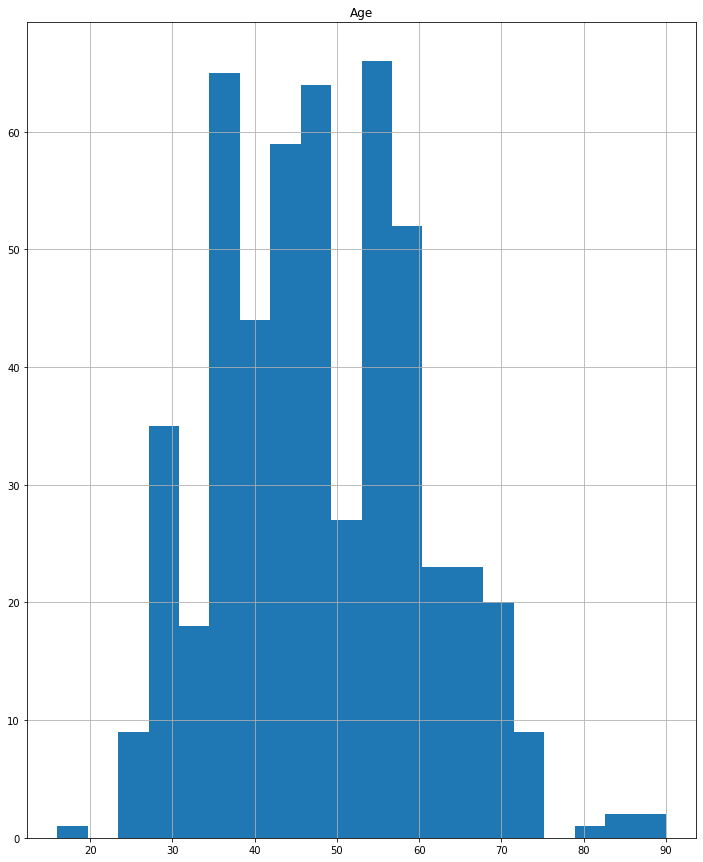

In [16]:
dia.hist(bins=20, figsize=(12, 15))
plt.show()

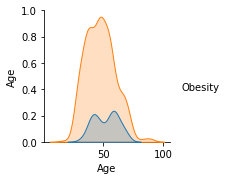

In [14]:
import seaborn as sns
sns.pairplot(dia, hue='Obesity')

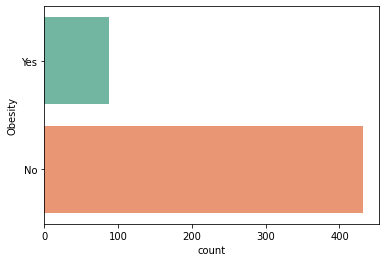

In [15]:
ax = sns.countplot(y='Obesity', data=dia, palette='Set2')

<Axes: >

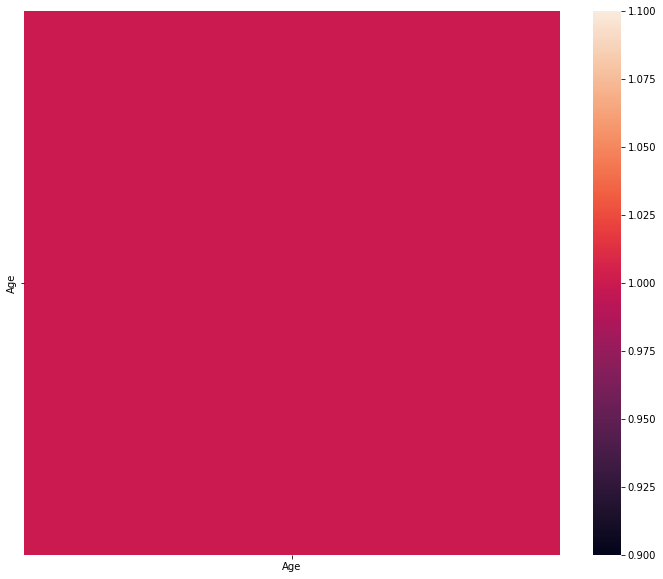

In [22]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(dia.corr(), ax=ax)

In [24]:
dia.dtypes


Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Obesity               object
class                 object
dtype: object

Obesity
0    432
1     88
dtype: int64


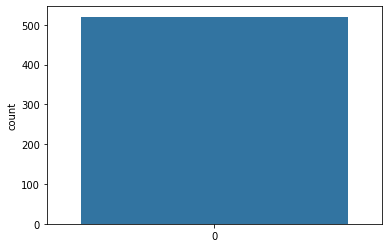

In [26]:
print(dia.groupby('Obesity').size())
sns.countplot(dia['Obesity'],label="Count")
plt.show()

In [25]:
n_dia = LabelEncoder()
dia['Gender'] = n_dia.fit_transform(dia['Gender'].astype('str')) 
dia['Polyuria'] = n_dia.fit_transform(dia['Polyuria'].astype('str')) 
dia['Polydipsia'] = n_dia.fit_transform(dia['Polydipsia'].astype('str')) 
dia['sudden weight loss'] = n_dia.fit_transform(dia['sudden weight loss'].astype('str')) 
dia['weakness'] = n_dia.fit_transform(dia['weakness'].astype('str')) 
dia['Obesity'] = n_dia.fit_transform(dia['Obesity'].astype('str')) 
dia['class'] = n_dia.fit_transform(dia['class'].astype('str')) 
dia.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Obesity,class
0,40,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,1
2,41,1,1,0,0,1,0,1
3,45,1,0,0,1,1,0,1
4,60,1,1,1,1,1,1,1


In [ ]:
x = dia.iloc[:, :-1].values
y = dia.iloc[:, 7]
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# 6 Algorithms for Base Classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

**1st Algorithm -Decision Tree Classifier**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print(y_test)

320    0
44     1
469    0
364    1
345    1
      ..
111    1
483    1
482    0
215    0
112    1
Name: class, Length: 156, dtype: int64


In [ ]:
print(pred_dt)

[0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1
 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1
 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1
 1 1 0 1 1 0 0 1]


In [ ]:
print('Classification Report of Decision Tree Induction:\n')
print(classification_report(y_test, pred_dt))

Classification Report of Decision Tree Induction:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        70
           1       0.99      0.97      0.98        86

    accuracy                           0.97       156
   macro avg       0.97      0.98      0.97       156
weighted avg       0.97      0.97      0.97       156



In [ ]:
from sklearn.metrics  import accuracy_score
test_data_accuracy = accuracy_score(y_test, pred_dt)*100
print("Accuracy score of the given model is: ",test_data_accuracy)

Accuracy score of the given model is:  97.43589743589743


In [ ]:
dt_cf=confusion_matrix(y_test, pred_dt)

In [ ]:
dt_cf

array([[69,  1],
       [ 3, 83]])

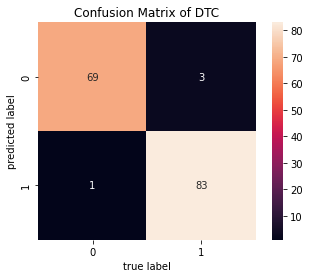

In [ ]:
sns.heatmap(dt_cf.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix of DTC');


**2nd Algorithm - GaussianNB**

In [ ]:
nb = GaussianNB()
nb.fit(x_train, y_train)
pred_nb = nb.predict(x_test)
print(y_test)

320    0
44     1
469    0
364    1
345    1
      ..
111    1
483    1
482    0
215    0
112    1
Name: class, Length: 156, dtype: int64


In [ ]:
print(pred_nb)

[1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1
 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1
 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 0 0 1]


In [ ]:
print('Classification Report of Decision Tree Induction:\n')
print(classification_report(y_test, pred_nb))

Classification Report of Decision Tree Induction:

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        70
           1       0.86      0.91      0.88        86

    accuracy                           0.87       156
   macro avg       0.87      0.86      0.86       156
weighted avg       0.87      0.87      0.86       156



In [ ]:
from sklearn.metrics  import accuracy_score
test_data_accuracy = accuracy_score(y_test, pred_nb)*100
print("Accuracy score of the given model is: ",test_data_accuracy)

Accuracy score of the given model is:  86.53846153846155


In [ ]:
nb_cf=confusion_matrix(y_test, pred_nb)
nb_cf

array([[57, 13],
       [ 8, 78]])

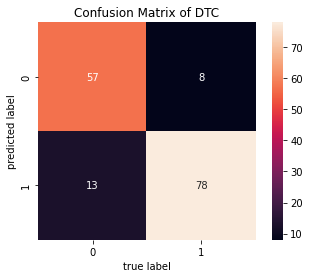

In [ ]:
sns.heatmap(nb_cf.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix of DTC');

**3rd Algorithm - Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)
print(y_test)

320    0
44     1
469    0
364    1
345    1
      ..
111    1
483    1
482    0
215    0
112    1
Name: class, Length: 156, dtype: int64


In [ ]:
print(pred_lr)

[1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1
 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1
 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 0 0 1]


In [ ]:
print('Classification Report of Decision Tree Induction:\n')
print(classification_report(y_test, pred_lr))

Classification Report of Decision Tree Induction:

              precision    recall  f1-score   support

           0       0.98      0.74      0.85        70
           1       0.83      0.99      0.90        86

    accuracy                           0.88       156
   macro avg       0.90      0.87      0.87       156
weighted avg       0.90      0.88      0.88       156



In [ ]:
from sklearn.metrics  import accuracy_score
test_data_accuracy = accuracy_score(y_test, pred_lr)*100
print("Accuracy score of the given model is: ",test_data_accuracy)

Accuracy score of the given model is:  87.82051282051282


In [ ]:
lr_cf=confusion_matrix(y_test, pred_lr)
lr_cf

array([[52, 18],
       [ 1, 85]])

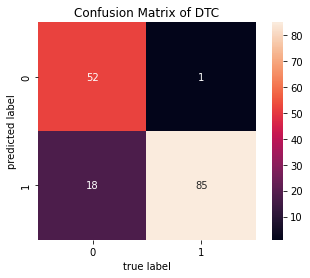

In [ ]:
sns.heatmap(lr_cf.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix of DTC');

**4th Algorithm - KNeighborsClassifier**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
print(y_test)

320    0
44     1
469    0
364    1
345    1
      ..
111    1
483    1
482    0
215    0
112    1
Name: class, Length: 156, dtype: int64


In [ ]:
print(pred_knn)

[0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1
 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0
 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0
 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1
 1 1 0 1 1 0 0 1]


In [ ]:
print('Classification Report of Decision Tree Induction:\n')
print(classification_report(y_test, pred_knn))

Classification Report of Decision Tree Induction:

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        70
           1       0.89      0.94      0.92        86

    accuracy                           0.90       156
   macro avg       0.91      0.90      0.90       156
weighted avg       0.90      0.90      0.90       156



In [ ]:
from sklearn.metrics  import accuracy_score
test_data_accuracy = accuracy_score(y_test, pred_knn)*100
print("Accuracy score of the given model is: ",test_data_accuracy)

Accuracy score of the given model is:  90.38461538461539


In [ ]:
knn_cf=confusion_matrix(y_test, pred_knn)
knn_cf

array([[60, 10],
       [ 5, 81]])

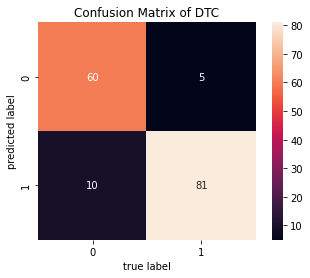

In [ ]:
sns.heatmap(knn_cf.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix of DTC');

**5th Algorithm - Support Vector Classifier**

In [ ]:
svm = SVC()
svm.fit(x_train, y_train)
pred_svm = svm.predict(x_test)
print(y_test)

320    0
44     1
469    0
364    1
345    1
      ..
111    1
483    1
482    0
215    0
112    1
Name: class, Length: 156, dtype: int64


In [ ]:
print(pred_svm)

[0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1
 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0
 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1
 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1
 1 1 0 1 1 0 0 1]


In [ ]:
print('Classification Report of Decision Tree Induction:\n')
print(classification_report(y_test, pred_svm))

Classification Report of Decision Tree Induction:

              precision    recall  f1-score   support

           0       0.97      0.80      0.88        70
           1       0.86      0.98      0.91        86

    accuracy                           0.90       156
   macro avg       0.91      0.89      0.89       156
weighted avg       0.91      0.90      0.90       156



In [ ]:
from sklearn.metrics  import accuracy_score
test_data_accuracy = accuracy_score(y_test, pred_svm)*100
print("Accuracy score of the given model is: ",test_data_accuracy)

Accuracy score of the given model is:  89.74358974358975


In [ ]:
svm_cf=confusion_matrix(y_test, pred_svm)
svm_cf

array([[56, 14],
       [ 2, 84]])

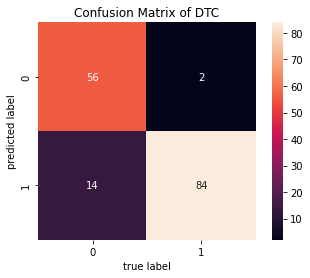

In [ ]:
sns.heatmap(svm_cf.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix of DTC');

**6th Algorithm: Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(y_test)

320    0
44     1
469    0
364    1
345    1
      ..
111    1
483    1
482    0
215    0
112    1
Name: class, Length: 156, dtype: int64


In [ ]:
print(pred_rf)

[0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1
 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1
 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1
 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1
 1 1 0 1 1 0 0 1]


In [ ]:
print('Classification Report of Decision Tree Induction:\n')
print(classification_report(y_test, pred_rf))

Classification Report of Decision Tree Induction:

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        70
           1       0.95      0.98      0.97        86

    accuracy                           0.96       156
   macro avg       0.96      0.96      0.96       156
weighted avg       0.96      0.96      0.96       156



In [ ]:
from sklearn.metrics  import accuracy_score
test_data_accuracy = accuracy_score(y_test, pred_rf)*100
print("Accuracy score of the given model is: ",test_data_accuracy)

Accuracy score of the given model is:  96.15384615384616


In [ ]:
rf_cf=confusion_matrix(y_test, pred_rf)
rf_cf

array([[66,  4],
       [ 2, 84]])

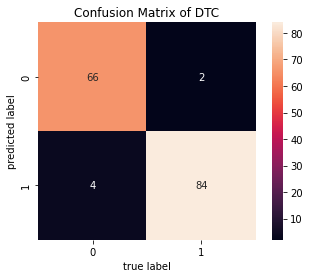

In [ ]:
sns.heatmap(rf_cf.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix of DTC');

**7th Algorithm: Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
pred_gb = gb.predict(x_test)
print(y_test)

320    0
44     1
469    0
364    1
345    1
      ..
111    1
483    1
482    0
215    0
112    1
Name: class, Length: 156, dtype: int64


In [ ]:
print(pred_gb)

[0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1
 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0
 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1
 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1
 1 1 0 1 1 0 0 1]


In [ ]:
print('Classification Report of Decision Tree Induction:\n')
print(classification_report(y_test, pred_gb))

Classification Report of Decision Tree Induction:

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        70
           1       0.89      0.98      0.93        86

    accuracy                           0.92       156
   macro avg       0.93      0.92      0.92       156
weighted avg       0.93      0.92      0.92       156



In [ ]:
from sklearn.metrics  import accuracy_score
test_data_accuracy = accuracy_score(y_test, pred_gb)*100
print("Accuracy score of the given model is: ",test_data_accuracy)

Accuracy score of the given model is:  92.3076923076923


In [ ]:
gb_cf=confusion_matrix(y_test, pred_gb)
gb_cf

array([[60, 10],
       [ 2, 84]])

In [1]:
sns.heatmap(gb_cf.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix of DTC');

NameError: ignored